# Caractériser les adhérents de la Médiathèque de Roubaix selon leur lieu d'habitation - partie 1 : Présentation et exploration des données

## Le jeu de données

On part de [données mises en ligne](https://opendata.roubaix.fr/explore/dataset/caracteristiques_adherents_2018) sur la plateforme open data de la Ville de Roubaix.

Ces données ont vocation à permettre de caractériser les adhérents de la Médiathèque de Roubaix, pour une année donnée (2018 ici).

In [2]:
import pandas as pd

adh = pd.read_csv("data/caracteristiques_adherents_2018.csv", sep=";")
adh.head(5)

,date_extraction,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,Tranches d’âge (1),Tranches d’âge (2),...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
0,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,25 - 64 ans,30 - 39 ans,...,gratuite,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Homme,"50.6873356245,3.16102905857"
1,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,0 - 14 ans,06 - 10 ans,...,gratuite,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"
2,2018,aucune trace,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,0 - 14 ans,06 - 10 ans,...,gratuite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"
3,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,65 ans et plus,65 - 79 ans,...,gratuite,13.0,0.0,13.0,0.0,13.0,0.0,0.0,Homme,"50.6873356245,3.16102905857"
4,2018,aucune trace,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 - 24 ans,15 - 17 ans,...,gratuite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"


## Individus et variables

Chaque ligne correspond à un individu (la taille de l'échantillon est de 13288 individus), pour lequel on dispose à la fois de variables qui permettent de connaître :
- ses caractéristiques propres :
    - tranche d'âge,
    - sexe,
    - commune de résidence,
    - quartier (IRIS) de résidence si l'adhérent habite Roubaix,
- son utilisation de l'équipement :
    - utilise-t-il ou non tel ou tel service ? combien de fois dans l'année ?
    - depuis combien de temps fréquent-il la Médiathèque ?
    - selon quelles modalités s'est-il inscrit ?
    
On dispose donc de variables :
- qualitatives
    - nominales :
        - activite
        - activite_emprunteur
        - activite_emprunteur_bus
        - activite_emprunteur_med
        - activite_salle_etude
        - activite_utilisateur_postes_informatiques
        - activite_utilisateur_wifi
        - Roubaisien ou non
        - Code IRIS de Roubaix
        - Nom de l’IRIS à Roubaix
        - Commune de résidence
        - inscription_attribut_action
        - inscription_attribut_zebre
        - inscription_carte
        - type_inscription
        - sexe
    - ordinales :
        - Tranches d’âge (1)
        - Tranches d’âge (2)
- quantitatives
        - nombre d’années d’adhésion
        - nb_venues
        - nb_venues_postes_informatiques
        - nb_venues_prets
        - nb_venues_prets_bus
        - nb_venues_prets_mediatheque
        - nb_venues_salle_etude
        - nb_venues_wifi
        
## Exploration des variables et filtrage des données
        
On procède à la vérification des différentes valeurs (avec pour objectif de mieux les comprendre, repérer d'éventuelles aberrations et aussi de ne garder que les informations qui nous intéressent).

### Exploration des vairables : typologie des personnes

On ne souhaite garder que les personnes physiques, on commence donc par examiner le type de cartes et à filtrer sur les cartes attribuées uniquement à des personnes physiques :

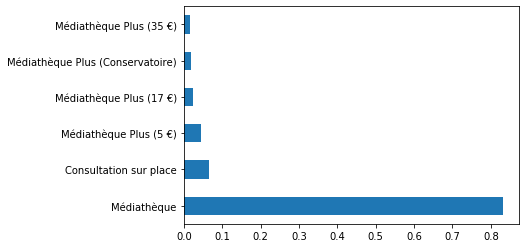

In [5]:
adh['inscription_carte'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

In [6]:
cartes_ok = ['Médiathèque', 'Consultation sur place', 'Médiathèque Plus (5 €)', 'Médiathèque Plus (17 €)','Médiathèque Plus (Conservatoire)', 'Médiathèque Plus (35 €)']
adh = adh[adh['inscription_carte'].isin(cartes_ok)]
adh['date_extraction'].count()

12964

On réduit donc l'échantillon de 13288 à 12964.

### Exploration des variables : information géographique

On poursuit par les informations de type géographique, sachant qu'on ne gardera que les lignes concernant des adhérents dont la commune de résidence est Roubaix et pour lesquels on dispose d'un code IRIS.
- Roubaisien ou non :

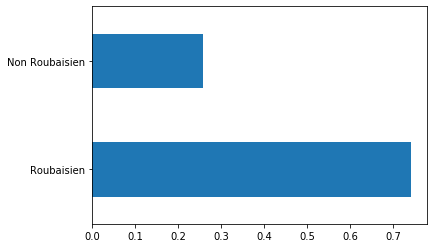

In [7]:
adh['Roubaisien ou non'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- Code IRIS de Roubaix :

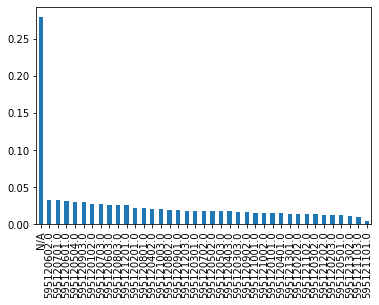

In [8]:
adh['Code IRIS de Roubaix'].fillna('N/A').value_counts(normalize=True).plot(kind='bar')

- Nom de l’IRIS à Roubaix :

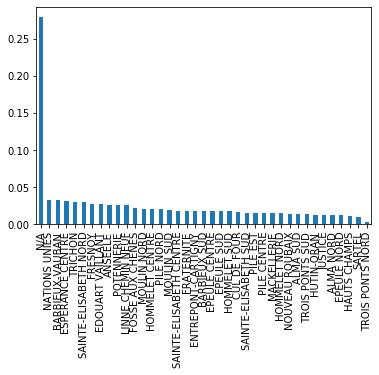

In [9]:
adh['Nom de l’IRIS à Roubaix'].fillna('N/A').value_counts(normalize=True).plot(kind='bar')

- Commune de résidence :

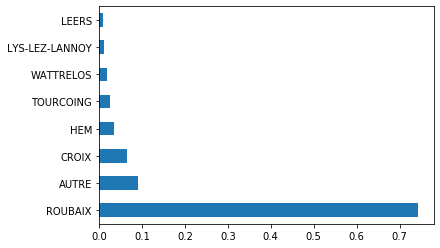

In [10]:
adh['Commune de résidence'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On effectue quelques tests de cohérence, puis on filtre les lignes en ne retenant que les Roubaisiens pour lesquels on dispose d'un IRIS.

On vérifie que les données des variables "Commune de résidence" et "Roubaisien ou non" sont cohérentes entre elles.

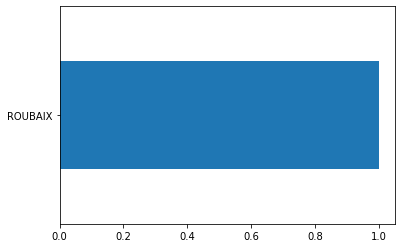

In [11]:
adh['Commune de résidence'][adh['Roubaisien ou non'] == 'Roubaisien'].value_counts(normalize=True).plot(kind='barh')

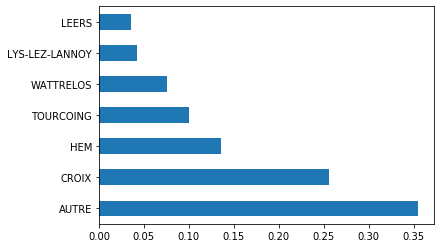

In [12]:
adh['Commune de résidence'][adh['Roubaisien ou non'] == 'Non Roubaisien'].value_counts(normalize=True).plot(kind='barh')

Pas d'incohérence, on peut ne garder que les habitants de Roubaix par exemple en se basant sur la variable 'Roubaisien ou non'.

In [13]:
adh = adh[adh['Roubaisien ou non'] == 'Roubaisien']
adh['date_extraction'].count()

9624

La taille de l'échantillon passe donc de 12964 à 9624 individus.
On vérifie ensuite que tous les Roubaisiens disposent d'un code IRIS, dans le cas contraire on ne garde que les lignes en disposant et on calcule le taux d'erreur.

In [43]:
nb_roubaisiens = adh['date_extraction'].count()
adh['Code IRIS de Roubaix'] =  adh['Code IRIS de Roubaix'].fillna('N/A') 
nb_roubaisiens_iris_ko = adh['date_extraction'][adh['Code IRIS de Roubaix'] == 'N/A'].count()
tx_iris_ko = (nb_roubaisiens_iris_ko / nb_roubaisiens).round(2)
print(f"Le taux d'adhérents habitant à Roubaix et pour lesquels on ne dispose pas d'un code IRIS est : {tx_iris_ko}")

Le taux d'adhérents habitant à Roubaix et pour lesquels on ne dispose pas d'un code IRIS est : 0.03


On supprime les lignes pour lesquelles le code IRIS est absent :

In [189]:
adh = adh[adh['Code IRIS de Roubaix'] != 'N/A']
adh['date_extraction'].count()

9341

La taille de l'échantillon passe de 9624 à 9341 indvidus.

### Exploration des variables : pratiques des inscrits

Une fois que l'on n'a conservé que les lignes nous intéressant, on regarde les autres variables qualitatives :
- activité :

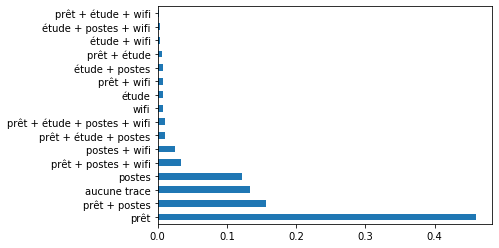

In [16]:
adh['activite'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur :

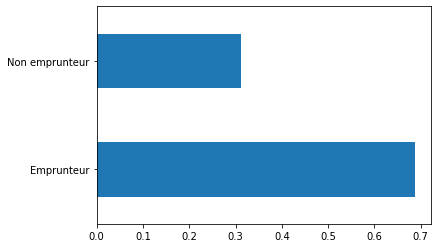

In [17]:
adh['activite_emprunteur'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur_bus :

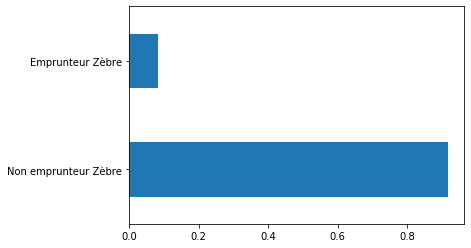

In [18]:
adh['activite_emprunteur_bus'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur_med :

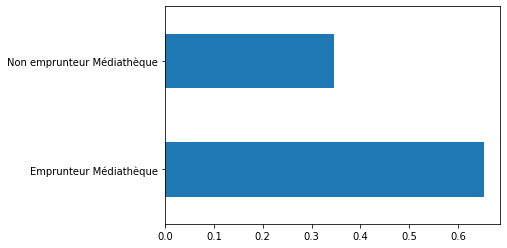

In [19]:
adh['activite_emprunteur_med'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_salle_etude :

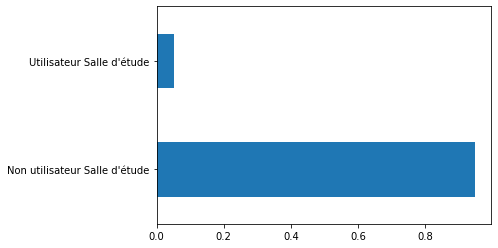

In [20]:
adh['activite_salle_etude'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_utilisateur_postes_informatiques :

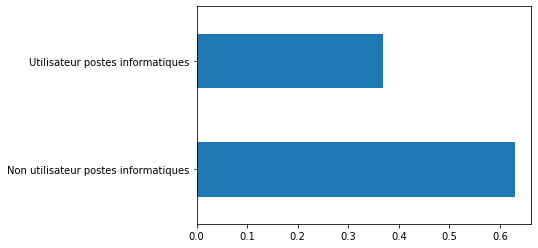

In [21]:
adh['activite_utilisateur_postes_informatiques'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_utilisateur_wifi :

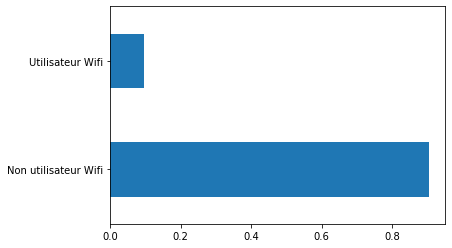

In [22]:
adh['activite_utilisateur_wifi'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- inscription_attribut_action :

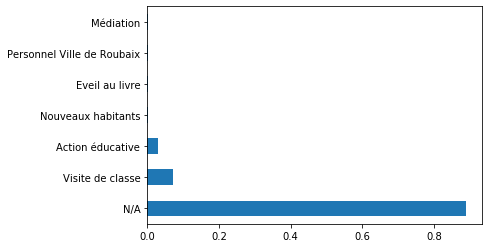

In [23]:
adh['inscription_attribut_action'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- inscription_attribut_zebre :

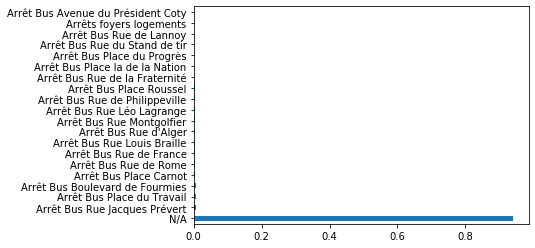

In [24]:
adh['inscription_attribut_zebre'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

Cette variable paraît offrir peu d'informations, on ne la retiendra donc pas.

- type-inscription

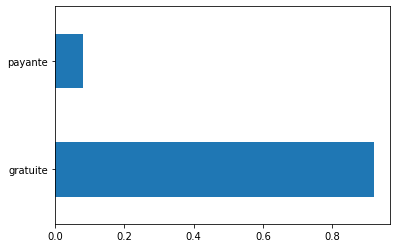

In [25]:
adh['type_inscription'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- sexe :

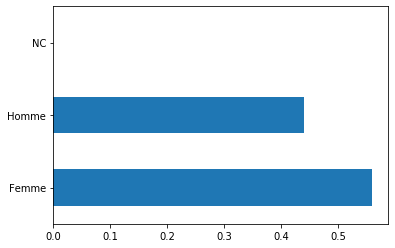

In [26]:
adh['sexe'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On poursuit par les variables qualitatives ordinales :
- Tranches d'âge (1)

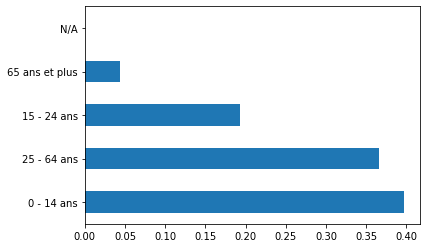

In [27]:
adh["Tranches d’âge (1)"].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- Tranches d’âge (2)

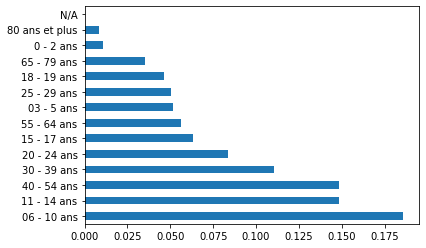

In [28]:
adh["Tranches d’âge (2)"].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On regarde enfin les variables quantitatives :
- nombre d’années d’adhésion

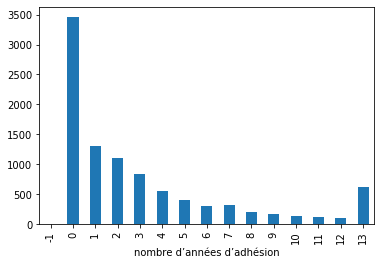

In [29]:
adh.groupby('nombre d’années d’adhésion')['nombre d’années d’adhésion'].count().plot.bar()

On trouve une valeur aberrante (-1), on la corrige en 0 :

In [30]:
adh.loc[adh['nombre d’années d’adhésion'] == -1, 'nombre d’années d’adhésion'] = 0

In [31]:
adh['nombre d’années d’adhésion'].describe()

count    9624.000000
mean        3.038965
std         3.846671
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        13.000000
Name: nombre d’années d’adhésion, dtype: float64

- nb_venues

In [32]:
adh['nb_venues'].describe()

count    9624.000000
mean        7.680590
std        15.588308
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       251.000000
Name: nb_venues, dtype: float64

- nb_venues_postes_informatiques

In [33]:
adh['nb_venues_postes_informatiques'].describe()

count    9624.000000
mean        3.541978
std        13.257249
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       251.000000
Name: nb_venues_postes_informatiques, dtype: float64

- nb_venues_prets

In [34]:
adh['nb_venues_prets'].describe()

count    9624.000000
mean        4.147756
std         7.911045
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       211.000000
Name: nb_venues_prets, dtype: float64

- nb_venues_prets_bus

In [35]:
adh['nb_venues_prets_bus'].describe()

count    9624.000000
mean        0.355362
std         1.878206
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        52.000000
Name: nb_venues_prets_bus, dtype: float64

- nb_venues_prets_mediatheque

In [36]:
adh['nb_venues_prets_mediatheque'].describe()

count    9624.000000
mean        3.792394
std         7.745062
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       211.000000
Name: nb_venues_prets_mediatheque, dtype: float64

- nb_venues_salle_etude

In [37]:
adh['nb_venues_salle_etude'].describe()

count    9624.000000
mean        0.344036
std         4.295849
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       215.000000
Name: nb_venues_salle_etude, dtype: float64

- nb_venues_wifi

In [38]:
adh['nb_venues_wifi'].describe()

count    9624.000000
mean        0.498337
std         4.532928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       218.000000
Name: nb_venues_wifi, dtype: float64

Sur l'ensemble de ces données quantitatives, on constate deux choses, sachant que l'on va ensuite regrouper toutes ces données selon les IRIS :
- le recours à la médiane est inopérant pour la plupart des variables, car celle-ci est souvent égale à 0. On va donc devoir recourir à la moyenne,
- on a pour chaque variable des valeurs maximales aberrantes, i.e. très éloignées des autres valeurs de l'échantillon. Si on doit utiliser des moyennes, on va devoir supprimer ces valeurs aberrantes.
On propose de supprimer toutes les valeurs supérieures à plus de 1,5 fois l'écart interquartile + le troisième quartile. On évalue auparavant le nombre de lignes qui serait concernées :

In [39]:
quanti = ['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi']
rejet = pd.DataFrame()
for q in quanti:
    q1 = adh[q].quantile(0.25)
    q3 = adh[q].quantile(0.75)
    eiq = q3 - q1
    r = adh[adh[q] > (q3 + 1.5 * eiq)]
    rejet = pd.concat([rejet, r])
rejet = rejet.drop_duplicates()
rejet['date_extraction'].count()

3361

On obtient beaucoup trop de lignes à rejeter (près d'un tiers de l'échantillon).
On refait un test en se contentant d'éliminer les valeurs supérieures au centile 99 :

In [40]:
quanti = ['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi']
rejet = pd.DataFrame()
for q in quanti:
    r = adh[adh[q] > adh[q].quantile(0.99)]
    rejet = pd.concat([rejet, r])
rejet = rejet.drop_duplicates()
rejet['date_extraction'].count()

408

On obtient 5% de l'échantillon à supprimer, on renonce également.

### On sauvegarde le nouveau jeu de données obtenu

In [44]:
adh.to_csv("data/adh.csv", header=True, index=False)